In [127]:
########################################
# importing packages
########################################
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualizations
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [128]:
########################################
# loading data and setting display options
########################################
# loading data
my_df = pd.read_excel('Survey_Data_Final_Exam.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [129]:
# Changing the names of columns

#Change the column names 
my_df.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 
              '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 
              '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', 
              '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', 
              '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
              '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', 
              '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
              'Current laptop',
              'Next laptop',
              'Program',
              'Age',
              'Gender',
              'Nationality', 
              'Ethnicity']

In [130]:
# Changing demographic data

placeholder_lst = []

for age in my_df['Age']:
    
    if age <= 20:
        age_range = '<20'
    
    elif age > 20 and age <= 25:
        age_range = '20-25'
    
    elif age > 25 and age <= 30:
        age_range = '26-30'
        
    elif age > 30 and age <= 35:
        age_range = '31-35'
    
    elif age > 36 and age <= 40:
        age_range = '36-40'
        
    elif age > 40:
        age_range = '>40'
        
    placeholder_lst.append(age_range)
    
my_df['age_range'] = placeholder_lst

In [131]:
# create a placeholder list
placeholder_lst = []

# create a list for nationality change
nation_change = [[['china'],'chinese'],
                 [['peru'], 'peruvian'],
                 [['mexico'], 'mexican'],
                 [['usa'], 'american'],
                 [['russia'], 'russian'],
                 [['ecuador'], 'ecuadorian'],
                 [['brazil'], 'brazilian'],
                 [['nigeria'], 'nigerian'],
                 [['korea','republicofkorea','southkorea'],'korean'],
                 [['spain'],'spanish'],
                 [['indonesia'],'indonesian'],
                 [['germany'],'german'],
                 [['colombia'], 'colombian'],
                 [['taiwan', 'taiwan(roc)'], 'taiwanese'],
                 [['japan'], 'japanese'],
                 [['canada'], 'canadian'],
                 [['philippines'], 'filipino'],
                 [['thailand'], 'thai'],
                 [['india'], 'indian'],
                 [['czechrepublic'], 'czech'],
                 [['belgium'], 'belgian'],
                 [['english'], 'british'],
                 [['ghana'], 'ghanaian'],
                 [['.', 'hispanic'], 'prefernottoanswer'],
                 [['italianandspanish', 'german/american', 'french/brazilian', 'british,indian', 'caribbean-american'], 'multi-ethnic'],
                 [['costarica'], 'costarrican'],
                 [['congolese(drcongo)'], 'congolese'],
                 [['venezuela'],'venezuelan'],
                 [['dominicanrepublic'],'dominican']
                
                ]

# create a for loop
for nationality in my_df['Nationality']:
    
    # remove " " and "."
    nationality = nationality.lower().replace(" ","").replace(".","")
    
    # create a loop
    for old_nat, new_nat in nation_change:
    
        # create if statement to check if nationality is wrong
        if nationality in old_nat:
            nationality = new_nat
    
    # append the correct nationality to a list
    placeholder_lst.append(nationality)

# create a new column
my_df['Nationality2'] = placeholder_lst

In [132]:
# create a placeholder list
placeholder_lst = []

# create a for loop
for nationality in my_df['Nationality2']:
    
    # check if nationality is in Asia
    if nationality in ['indian','chinese','taiwanese','filipino','korean',
                       'thai','indonesian','vietnamese','japanese','palestinian',
                       'kyrgyz','pakistani','bangladeshi','iran','malaysia']:
        nationality = 'Asian'
    
    # check if nationality is in Europe
    elif nationality in ['german','russian','italian','spanish','norwegian',
                         'turkish','belgian','czech','british','swiss',
                         'ukrainian','portuguese','belarus','dutch','poland',
                         'armenia','dutch']:
        nationality = 'European'
    
    # check if nationality is in North America
    elif nationality in ['mexican','american','canadian','dominican','costarrican',
                         'panama','guatemalan','elsalvador','honduran']:
        nationality = 'North American'
    
    # check if nationality is in South America
    elif nationality in ['peruvian','colombian','brazilian','ecuadorian',
                         'venezuelan']:
        nationality = 'South American'
    
    # check if nationality is in Africa
    elif nationality in ['nigerian','kenyan','congolese','ghanaian','ugandan',
                         'mauritius','southafrican','cameroon']:
        nationality = 'Africa'
    
    # check if nationality is multi-ethnic
    elif nationality == 'multi-ethnic':
        nationality = 'multi-ethnic'
    
    # put 'prefernottoanswer' for the remaining
    else: 
        nationality = 'prefernottoanswer'
    
    # append the new nationality group to a list
    placeholder_lst.append(nationality)

# create a new column
my_df['Nationality_continent'] = placeholder_lst

In [133]:
# Extroversion - 20 + (1) - (6)  + (11) - (16)  + (21)- (26) + (31)  - (36) + (41) - (46)

#my_df['Extroversion'] = 20 + new_df['1'] - new_df['6'] + new_df['11'] - new_df['16'] +new_df['21'] - new_df['26'] + new_df['31'] - new_df['36'] + new_df['41'] - new_df['46']
#my_df['Agreeableness'] = 14 - new_df['2'] + new_df['7'] - new_df['12'] + new_df['17'] - new_df['22'] + new_df['27'] - new_df['32'] + new_df['37'] + new_df['42'] + new_df['47']
#my_df['Conscientiousness'] = 14 + new_df['3'] - new_df['8'] + new_df['13'] - new_df['18'] + new_df['23'] - new_df['28'] + new_df['33'] - new_df['38'] + new_df['43'] + new_df['48']
#my_df['Neuroticism'] = 38 - new_df['4'] + new_df['9'] - new_df['14'] + new_df['19'] - new_df['24'] - new_df['29'] - new_df['34'] - new_df['39'] - new_df['44'] - new_df['49']  
#my_df['Openness'] = 8 + new_df['5'] - new_df['10'] + new_df['15'] - new_df['20'] + new_df['25'] - new_df['30'] + new_df['35'] + new_df['40'] + new_df['45'] + new_df['50']


my_df['Extroversion'] = 20 + my_df['1'] - my_df['6'] + my_df['11'] - my_df['16'] +my_df['21'] - my_df['26'] + my_df['31'] - my_df['36'] + my_df['41'] - my_df['46']
my_df['Agreeableness'] = 14 - my_df['2'] + my_df['7'] - my_df['12'] + my_df['17'] - my_df['22'] + my_df['27'] - my_df['32'] + my_df['37'] + my_df['42'] + my_df['47']
my_df['Conscientiousness'] = 14 + my_df['3'] - my_df['8'] + my_df['13'] - my_df['18'] + my_df['23'] - my_df['28'] + my_df['33'] - my_df['38'] + my_df['43'] + my_df['48']
my_df['Neuroticism'] = 38 - my_df['4'] + my_df['9'] - my_df['14'] + my_df['19'] - my_df['24'] - my_df['29'] - my_df['34'] - my_df['39'] - my_df['44'] - my_df['49']  
my_df['Openness'] = 8 + my_df['5'] - my_df['10'] + my_df['15'] - my_df['20'] + my_df['25'] - my_df['30'] + my_df['35'] + my_df['40'] + my_df['45'] + my_df['50']


Note : We need to rename all the demographic columns as well as drop surveyID

In [134]:
# Columns to be dropped 
# 'What laptop do you currently have?'
# 'What program are you in?'
# 'What is your age?'
# 'Gender'
# 'What is your nationality?'
# 'What is your ethnicity?'
# 'What laptop would you buy in next assuming if all laptops cost the same?'


# dropping demographic information
my_df_behavior = my_df.loc[:, ['Extroversion','Agreeableness','Conscientiousness', 'Neuroticism','Openness' ]]
                             


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(my_df_behavior)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(my_df_behavior)


# converting scaled data into a DataFrame
behavior_scaled = pd.DataFrame(X_scaled)


# reattaching column names
behavior_scaled.columns = my_df_behavior.columns


# checking pre- and post-scaling variance
print(pd.np.var(my_df_behavior), '\n\n')
print(pd.np.var(behavior_scaled))

Extroversion         44.910291
Agreeableness        30.793361
Conscientiousness    30.985214
Neuroticism          47.668680
Openness             27.665530
dtype: float64 


Extroversion         1.0
Agreeableness        1.0
Conscientiousness    1.0
Neuroticism          1.0
Openness             1.0
dtype: float64


C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


In [135]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

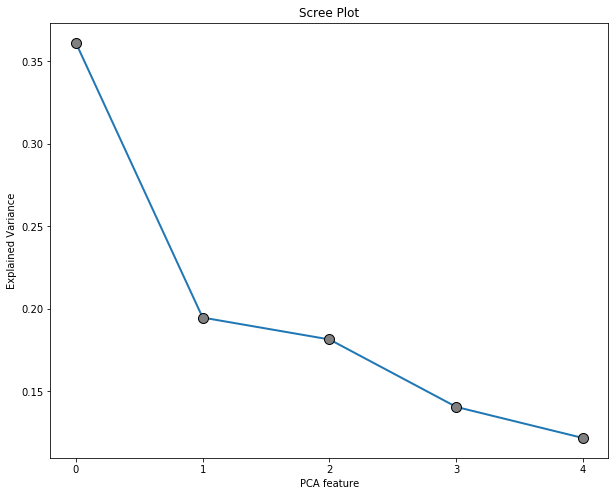

In [136]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca = pca.fit_transform(behavior_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [137]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 2,
            random_state = 802)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_3 = pca_3.fit_transform(behavior_scaled)

In [138]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(behavior_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(behavior_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


2 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                      0     1     2     3     4
Extroversion      -0.39  0.38 -0.72 -0.03 -0.43
Agreeableness     -0.51  0.30  0.15  0.65  0.45
Conscientiousness -0.49 -0.35  0.46  0.12 -0.65
Neuroticism       -0.31 -0.77 -0.44 -0.02  0.34
Openness          -0.50  0.21  0.24 -0.75  0.29


2 Components Factor Loadings
------------------------------
                      0     1
Extroversion      -0.39  0.38
Agreeableness     -0.51  0.30
Conscientiousness -0.49 -0.35
Neuroticism       -0.31 -0.77
Openness          -0.50  0.21



C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  app.launch_new_instance()


In [139]:
# Defining Components
# 0	Cold_Realist OR MIXED
# 1	Calm_Outsider
# 2	Calm_Insider
# 3	Polite_Realist
# 4	Polite_Dreamer


# naming each principal component
factor_loadings_3.columns = ['Balanced',
                             'Calm_Outsider']


# checking the result
factor_loadings_3

,Balanced,Calm_Outsider
Extroversion,-0.391649,0.382088
Agreeableness,-0.509978,0.299646
Conscientiousness,-0.485079,-0.351788
Neuroticism,-0.311189,-0.771043
Openness,-0.504375,0.214379


In [140]:
# analyzing factor strengths per customer
X_pca_reduced = pca_3.transform(behavior_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# checking the results
X_pca_df

,0,1
0,-0.028894,-0.360299
1,0.299141,-0.308343
2,0.593686,-1.964294
3,0.094499,0.696318
4,1.640661,0.363863
5,1.933548,1.319595
6,1.161179,1.099029
7,3.020929,-0.606478
8,-1.373695,-0.626535
9,0.910072,-0.896164


In [141]:
pd.np.var(X_pca_df)

C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


0    1.806234
1    0.973863
dtype: float64

In [142]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['Balanced',
                      'Fancy Calm_Outsider']


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

0    1.806234
1    0.973863
dtype: float64 


Balanced               1.0
Fancy Calm_Outsider    1.0
dtype: float64


C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


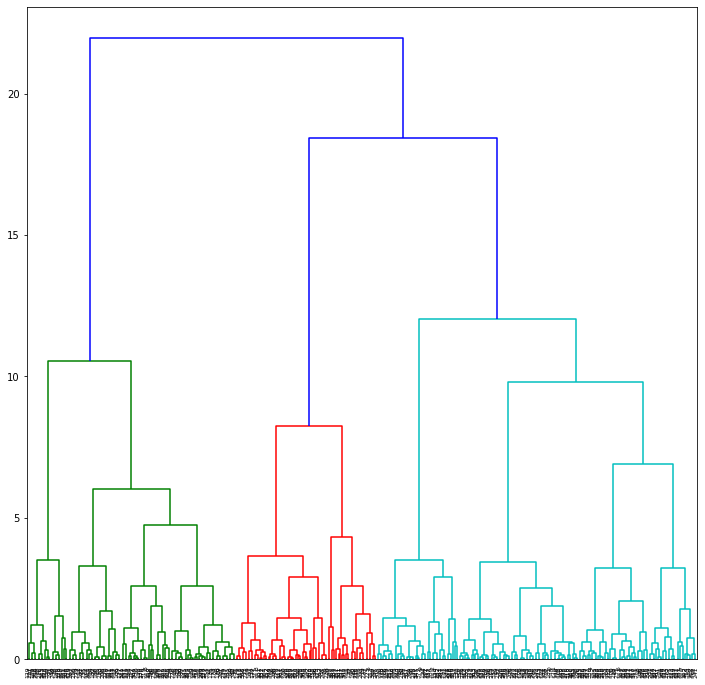

In [143]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

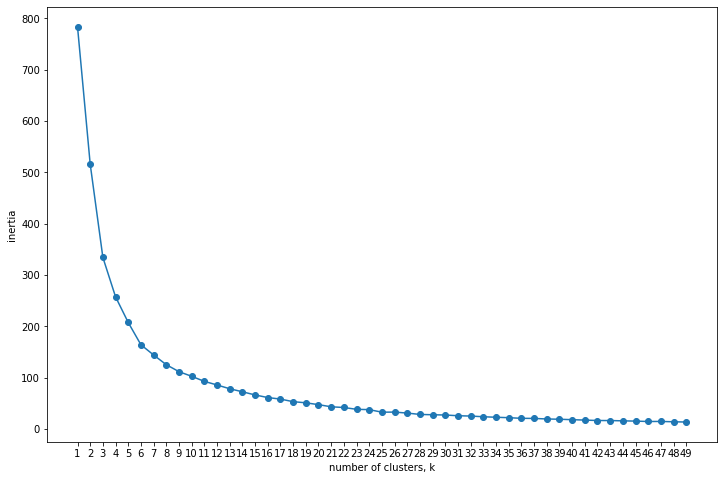

In [144]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

In [148]:
# INSTANTIATING a k-Means object with three clusters
customers_k_pca = KMeans(n_clusters = 3,
                         random_state = 802)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    143
1    139
2    110
Name: Cluster, dtype: int64


In [152]:
# 0	Cold_Realist OR MIXED
# 1	Calm_Outsider
# 2	Calm_Insider

# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Balanced',
                            'Calm_Outsider']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Balanced,Calm_Outsider
0,-0.98,-0.24
1,0.76,-0.67
2,0.31,1.16


In [167]:
# Changing Mac to Macbook
my_df['Current laptop'] =  my_df['Current laptop'].replace('MAC', 'Macbook')
my_df['Next laptop'] =  my_df['Next laptop'].replace('MAC', 'Macbook')

In [168]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([my_df.loc[ : , ['Current laptop', 'Next laptop', 'Program', 'Gender', 'age_range',
                                                'Nationality_continent', 'Ethnicity']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Current laptop',
                              'Next laptop',
                              'Program',
                              'Gender',
                              'age_range',
                              'Nationality_continent',
                              'Ethnicity',
                              'Cluster',
                              'Balanced',
                              'Calm_Outsider']




In [169]:
# renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


Boxplots analysis

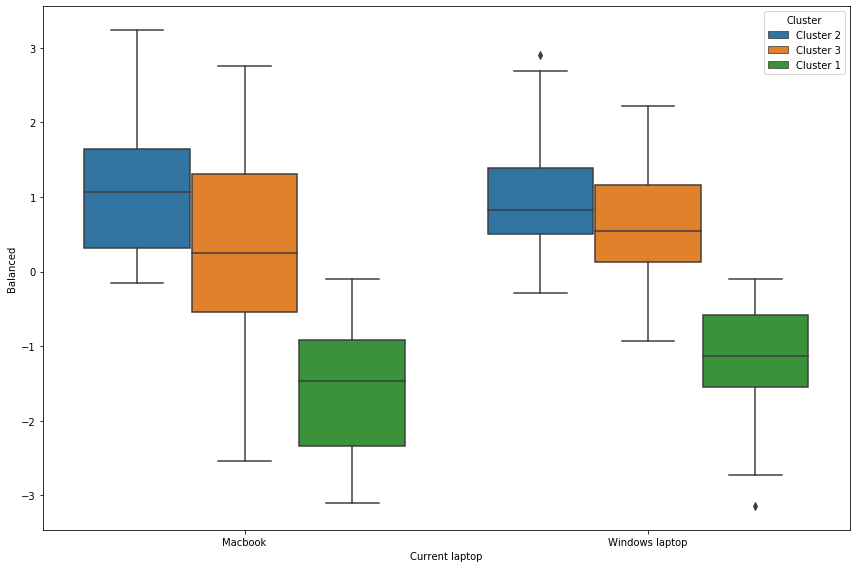

In [170]:
########################
# Current laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'Balanced',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

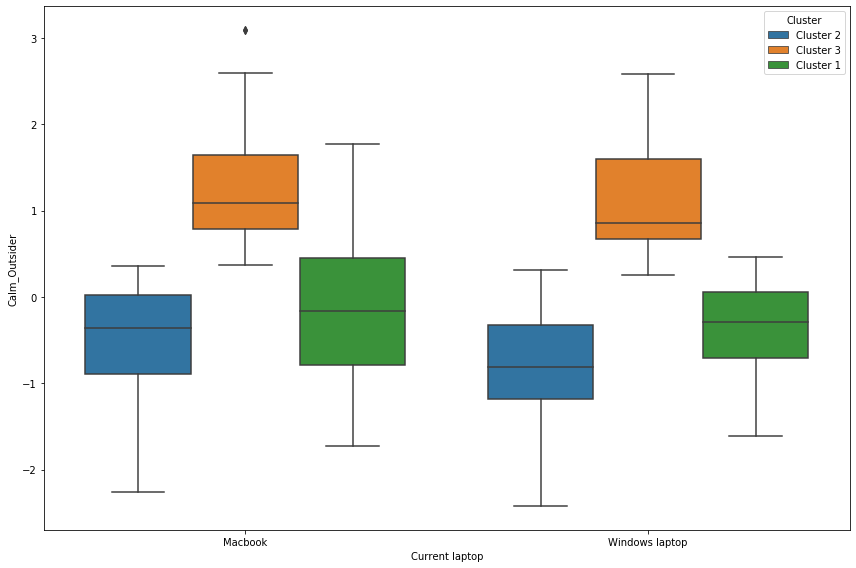

In [171]:
########################
# Calm_Outsider
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'Calm_Outsider',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

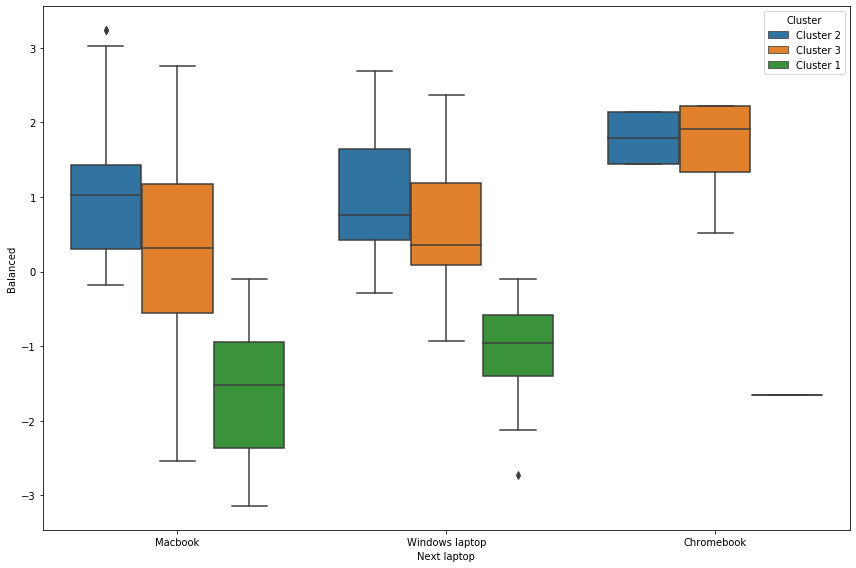

In [172]:
########################
# Next laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'Balanced',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

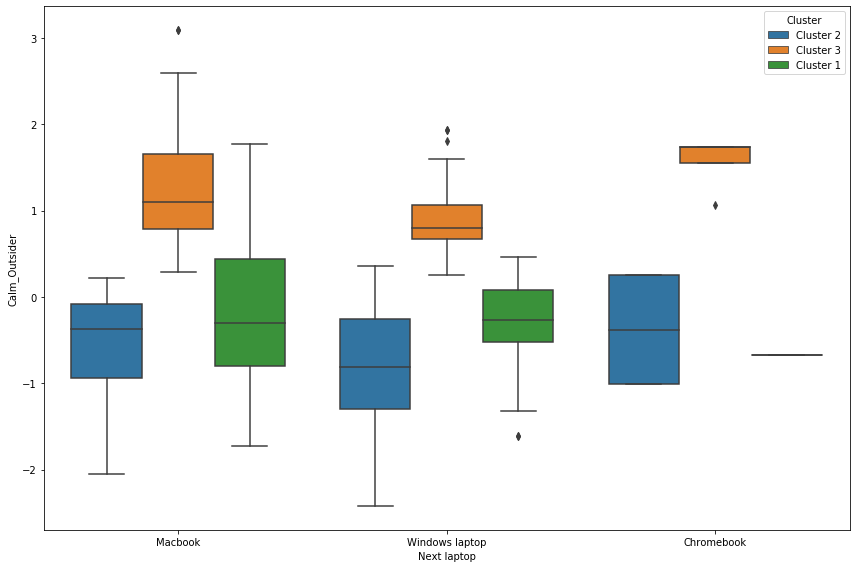

In [173]:
########################
# Next laptop
########################

# Calm_Outsider
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'Calm_Outsider',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

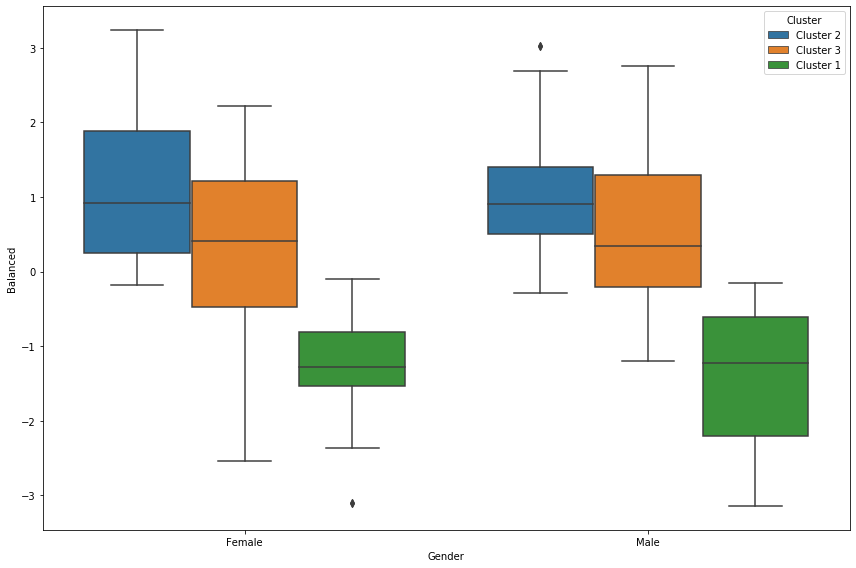

In [174]:
########################
# Gender
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Balanced',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

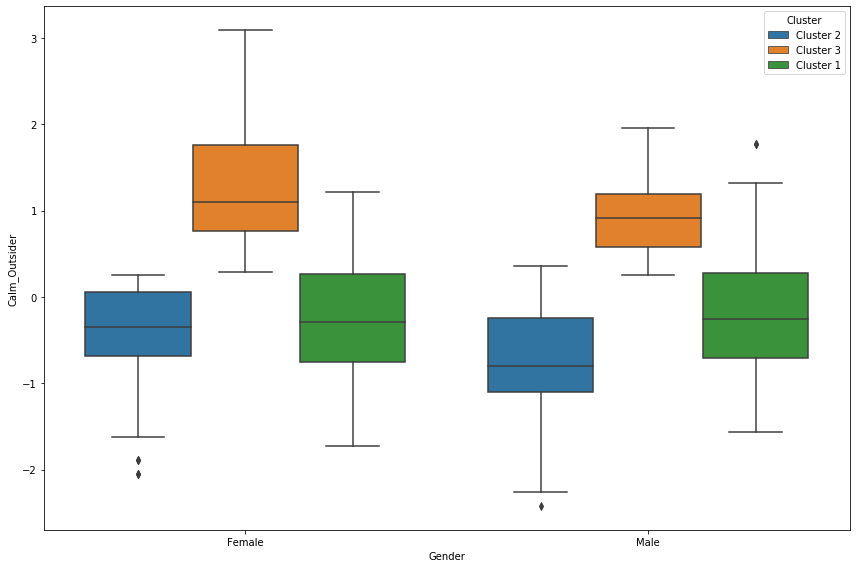

In [176]:
########################
# Gender
########################

# Calm_Outsider
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Calm_Outsider',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

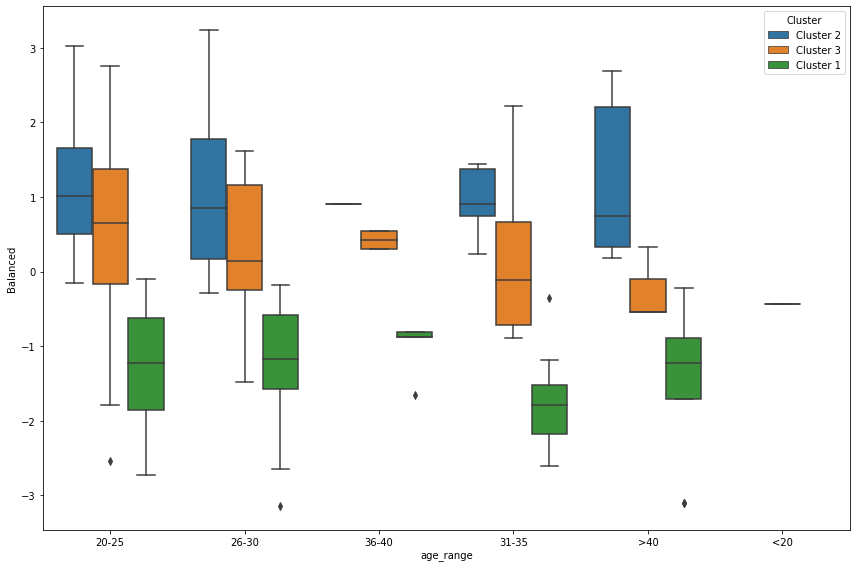

In [177]:
########################
# age_range
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_range',
            y = 'Balanced',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

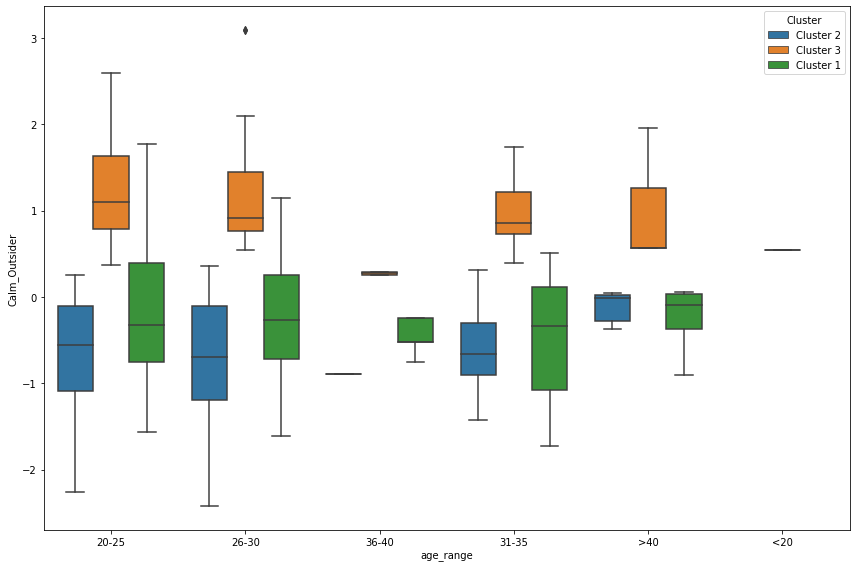

In [178]:
########################
# age_range
########################

# Calm_Outsider
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_range',
            y = 'Calm_Outsider',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

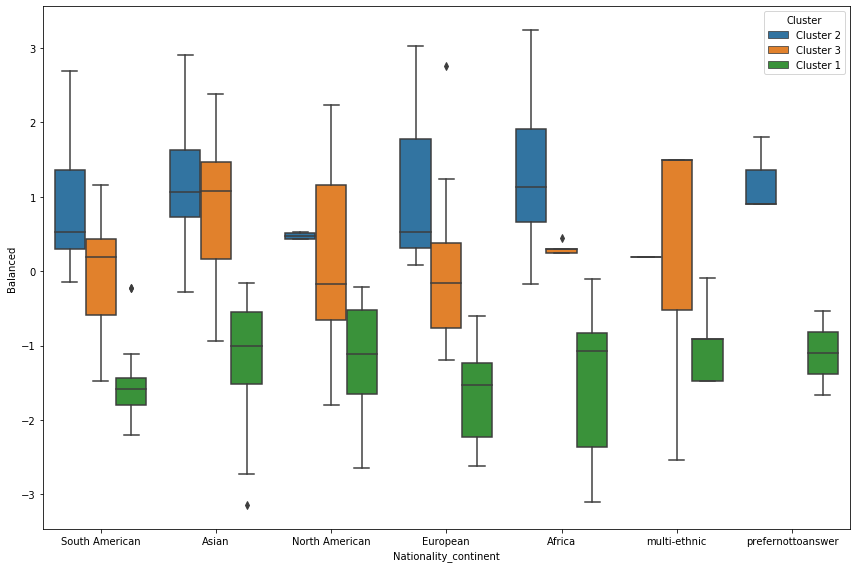

In [179]:
########################
# Nationality_continent
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Nationality_continent',
            y = 'Balanced',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

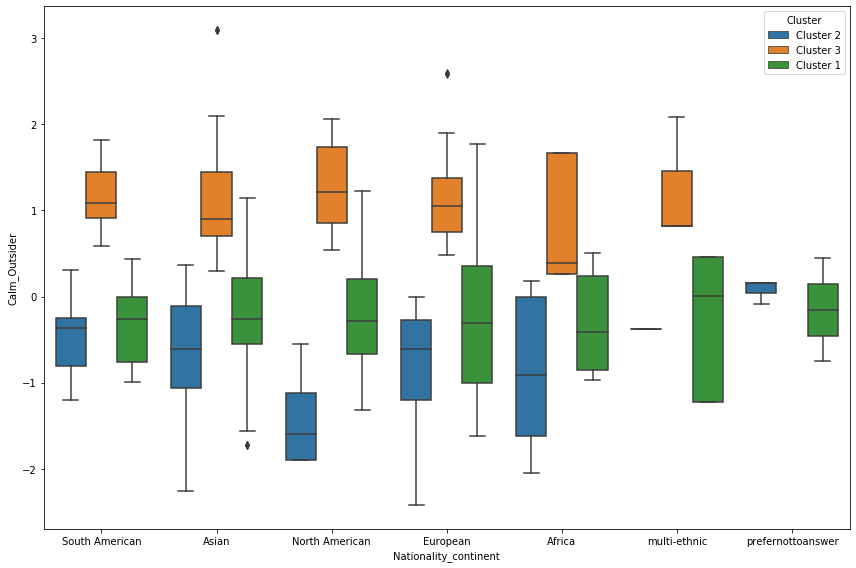

In [180]:
########################
# Nationality_continent
########################

# Calm_Outsider
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Nationality_continent',
            y = 'Calm_Outsider',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

New Approach based on Means

In [107]:
# New approach

my_df['Current laptop'].value_counts()

Macbook           199
Windows laptop    192
MAC                 1
Name: Current laptop, dtype: int64

In [109]:
# checking the results
my_df['Current laptop'].value_counts()

Macbook           200
Windows laptop    192
Name: Current laptop, dtype: int64

In [89]:
# looking for the variances in means

my_df.groupby(['Current laptop']).mean().round(2)

# On average Macbook users are more Extrovertic an less Neurotic
# which goes well with the research

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,Age,Extroversion,Agreeableness,Conscientiousness,Neuroticism,Openness
Current laptop,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Macbook,3.10,2.77,3.56,3.07,3.37,2.72,3.82,2.35,3.30,2.52,3.70,1.75,4.08,3.64,4.07,3.00,4.14,2.32,2.82,2.14,3.54,2.47,3.36,2.88,3.86,2.46,3.74,2.30,2.64,2.02,3.06,2.23,3.86,2.88,3.92,3.14,3.65,2.38,2.76,2.7,3.16,3.98,3.70,2.74,3.94,3.16,3.81,3.69,2.61,3.79,3.92,2.34,4.00,4.16,3.98,3.84,4.11,4.04,3.92,4.08,4.01,2.74,4.14,4.24,3.92,2.54,3.95,3.90,3.98,3.70,4.19,26.00,22.06,27.92,26.88,20.9,26.96
Windows laptop,2.78,2.75,3.58,2.73,3.25,3.08,3.84,2.52,3.31,2.29,3.59,1.72,4.10,3.54,3.89,3.23,4.09,2.32,2.96,2.11,3.21,2.43,3.22,2.62,3.86,2.74,3.80,2.33,2.33,2.21,2.77,2.31,3.77,2.66,3.89,3.29,3.70,2.27,2.22,2.7,2.86,3.89,3.68,2.42,3.91,3.70,3.96,3.85,2.34,3.80,3.92,2.38,4.01,4.13,3.93,3.86,3.95,4.01,3.86,3.93,4.07,2.87,4.10,4.28,3.96,2.48,3.88,3.99,4.15,3.83,4.36,28.73,19.16,28.07,26.77,23.4,26.69
